In [1]:
# 07_trend_longitudinali.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Carica dataset
df = pd.read_parquet("../data/processed/RM_Dimessi_clean.parquet")

# 🧹 Pulizia minima
df = df[df["anno"].notna()]
df["anno"] = df["anno"].astype(int)

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


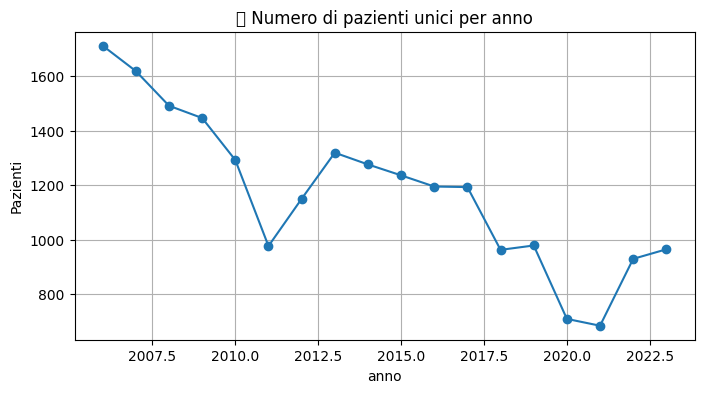

In [2]:
df["patient_id_unico"] = df["patient_id"].astype(str)

pazienti_per_anno = df.groupby("anno")["patient_id_unico"].nunique()

plt.figure(figsize=(8, 4))
pazienti_per_anno.plot(marker='o')
plt.title("👥 Numero di pazienti unici per anno")
plt.ylabel("Pazienti")
plt.grid(True)
plt.show()

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


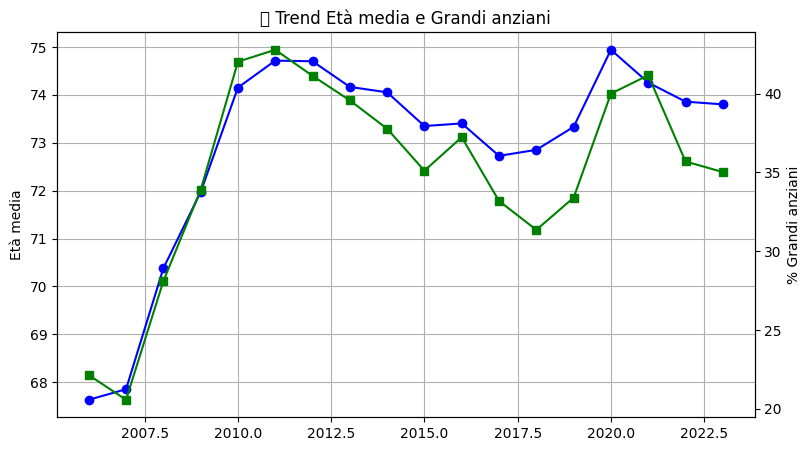

In [3]:
df["età_clinica"] = df["età del paziente dimesso"].apply(
    lambda x: "adulto" if x < 65 else "anziano" if x < 80 else "grande_anziano"
)

# Età media
eta_media = df.groupby("anno")["età del paziente dimesso"].mean()

# % grandi anziani
grandi_anziani = df[df["età_clinica"] == "grande_anziano"].groupby("anno")["patient_id"].count()
totali = df.groupby("anno")["patient_id"].count()
percentuali = (grandi_anziani / totali) * 100

# 📊 Plot
fig, ax1 = plt.subplots(figsize=(9, 5))
ax1.plot(eta_media, label="Età media", color="blue", marker="o")
ax2 = ax1.twinx()
ax2.plot(percentuali, label="% Grandi anziani", color="green", marker="s")

ax1.set_ylabel("Età media")
ax2.set_ylabel("% Grandi anziani")
plt.title("📈 Trend Età media e Grandi anziani")
ax1.grid(True)
plt.show()

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


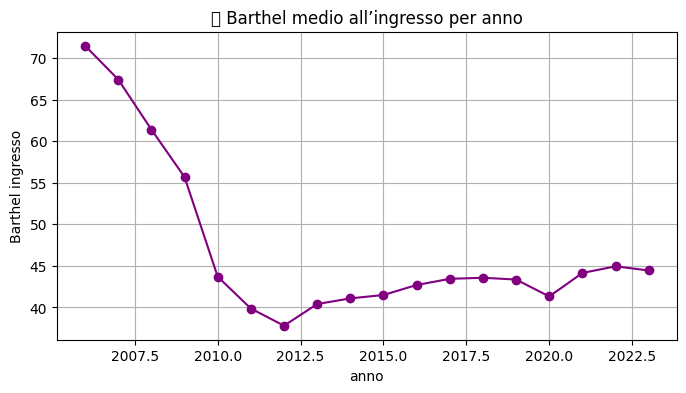

In [4]:
barthel_cols = [f"bartric{i}" for i in range(1, 12)]
df["barthel_totale_ingresso"] = df[barthel_cols].sum(axis=1)

barthel_trend = df.groupby("anno")["barthel_totale_ingresso"].mean()

plt.figure(figsize=(8, 4))
barthel_trend.plot(marker='o', color='purple')
plt.title("🧬 Barthel medio all’ingresso per anno")
plt.ylabel("Barthel ingresso")
plt.grid(True)
plt.show()

/Users/dantetrabassi/Desktop/rehab-intelligence/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


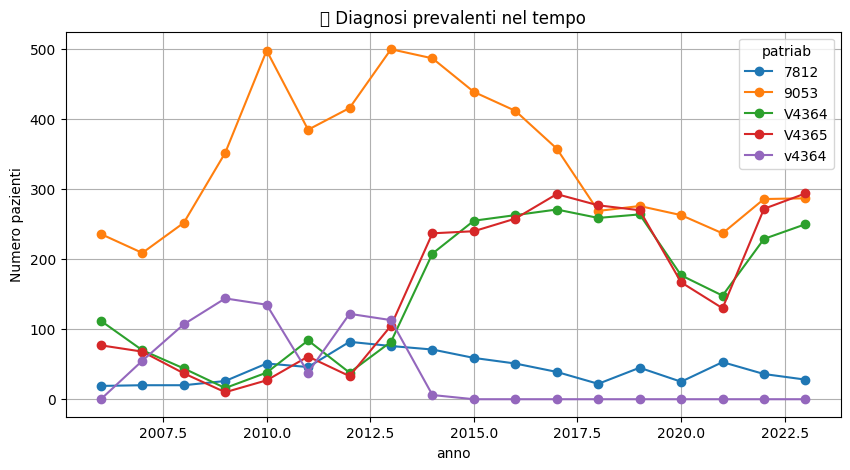

In [5]:
diagnosi_top = df["patriab"].value_counts().nlargest(5).index.tolist()
df_filt = df[df["patriab"].isin(diagnosi_top)]

diagnosi_trend = df_filt.groupby(["anno", "patriab"])["patient_id"].count().unstack().fillna(0)

diagnosi_trend.plot(marker='o', figsize=(10, 5))
plt.title("📊 Diagnosi prevalenti nel tempo")
plt.ylabel("Numero pazienti")
plt.grid(True)
plt.show()

📊 Sintesi visiva dei tuoi 4 grafici
1. 📈 Diagnosi prevalenti nel tempo
Codice 9053 (probabilmente frattura del collo femore?) domina fino al 2017.
Dal 2014 circa, emergono V4364, V4365 (riabilitazioni specifiche?) che superano 9053.
Diagnosi 7812 rimane marginale ma stabile.

🔍 Insight: si intravede un cambiamento nel case-mix → potrebbe riflettere una variazione nei criteri di accesso, politica regionale, o capacità erogativa.

2. 🦾 Barthel medio all’ingresso per anno
Crollo tra 2006 e 2011 (da 71 → 38), poi stabilizzazione attorno a 43.
Picco negativo nel 2012, poi recupero graduale.

🔍 Insight: cambiamento importante nel livello funzionale iniziale dei pazienti. Possibile cambiamento nel tipo di pazienti accettati o nel criterio di valutazione.

3. 👴 Età media & % grandi anziani
L’età media sale da 68 → 75 (2006–2011), poi si stabilizza.
La % di grandi anziani (>80 anni) raggiunge oltre il 40% tra 2010–2020.

🔍 Insight: invecchiamento progressivo della popolazione trattata. Ottimo dato per sostenere un eventuale bisogno di modelli predittivi mirati all'età.

4. 👥 Numero di pazienti unici per anno
Tendenza in calo dal 2006 al 2021 (da ~1700 a ~700).
Ripresa solo marginale nel 2022.

🔍 Insight: utile per il Policlinico per analisi di efficienza, budget o valutazioni legate alla domanda storica di riabilitazione.

In [7]:
import os

files = [
    "../results/figures/trend_pazienti_unici.png",
    "../results/figures/trend_eta_grandianziani.png",
    "../results/figures/trend_barthel_ingresso.png",
    "../results/figures/trend_diagnosi.png"
]

for f in files:
    print(f"{f} → {'✅ trovato' if os.path.exists(f) else '❌ NON trovato'}")

../results/figures/trend_pazienti_unici.png → ✅ trovato
../results/figures/trend_eta_grandianziani.png → ✅ trovato
../results/figures/trend_barthel_ingresso.png → ✅ trovato
../results/figures/trend_diagnosi.png → ✅ trovato
